In [1]:
# install missingno module in jupyter notebook
#!pip install missingno

In [2]:
# import all library for data visulization

import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Below library used for check missing value from each features in matrix or diagram form
import missingno as msno

# The Data
- Let start reading titanic data set i.e train.csv file into pandas dataframe

In [3]:
# read the data from train.csv using pandas's read_csv() function
df = pd.read_csv("train.csv")

In [4]:
# that shows first five row from data sets
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# show last five row
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# it's show number of feature(column) and no of observation(row)
df.shape

(891, 12)

In [7]:
# it shows all details like column name,non-null count,data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#it shows only data types of each column
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# feature information
- numerical columns are
    - Age and Fare 
- categorical columns are
    - Sex,PClass

In [9]:
# to shows all columns name from data set 
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Exploratory Data Analysis
- we'll start by just checking the mising value

## Missing Data
- 

In [10]:
# isnull() function used for check data inside the features are null or not it's retrun boolean value i.e true for null
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# to count tatal number of null from each features(column) 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#len() retuen no of observation in data sets
len(df)

# here we check no of percentage of null value in each features

df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<Axes: >

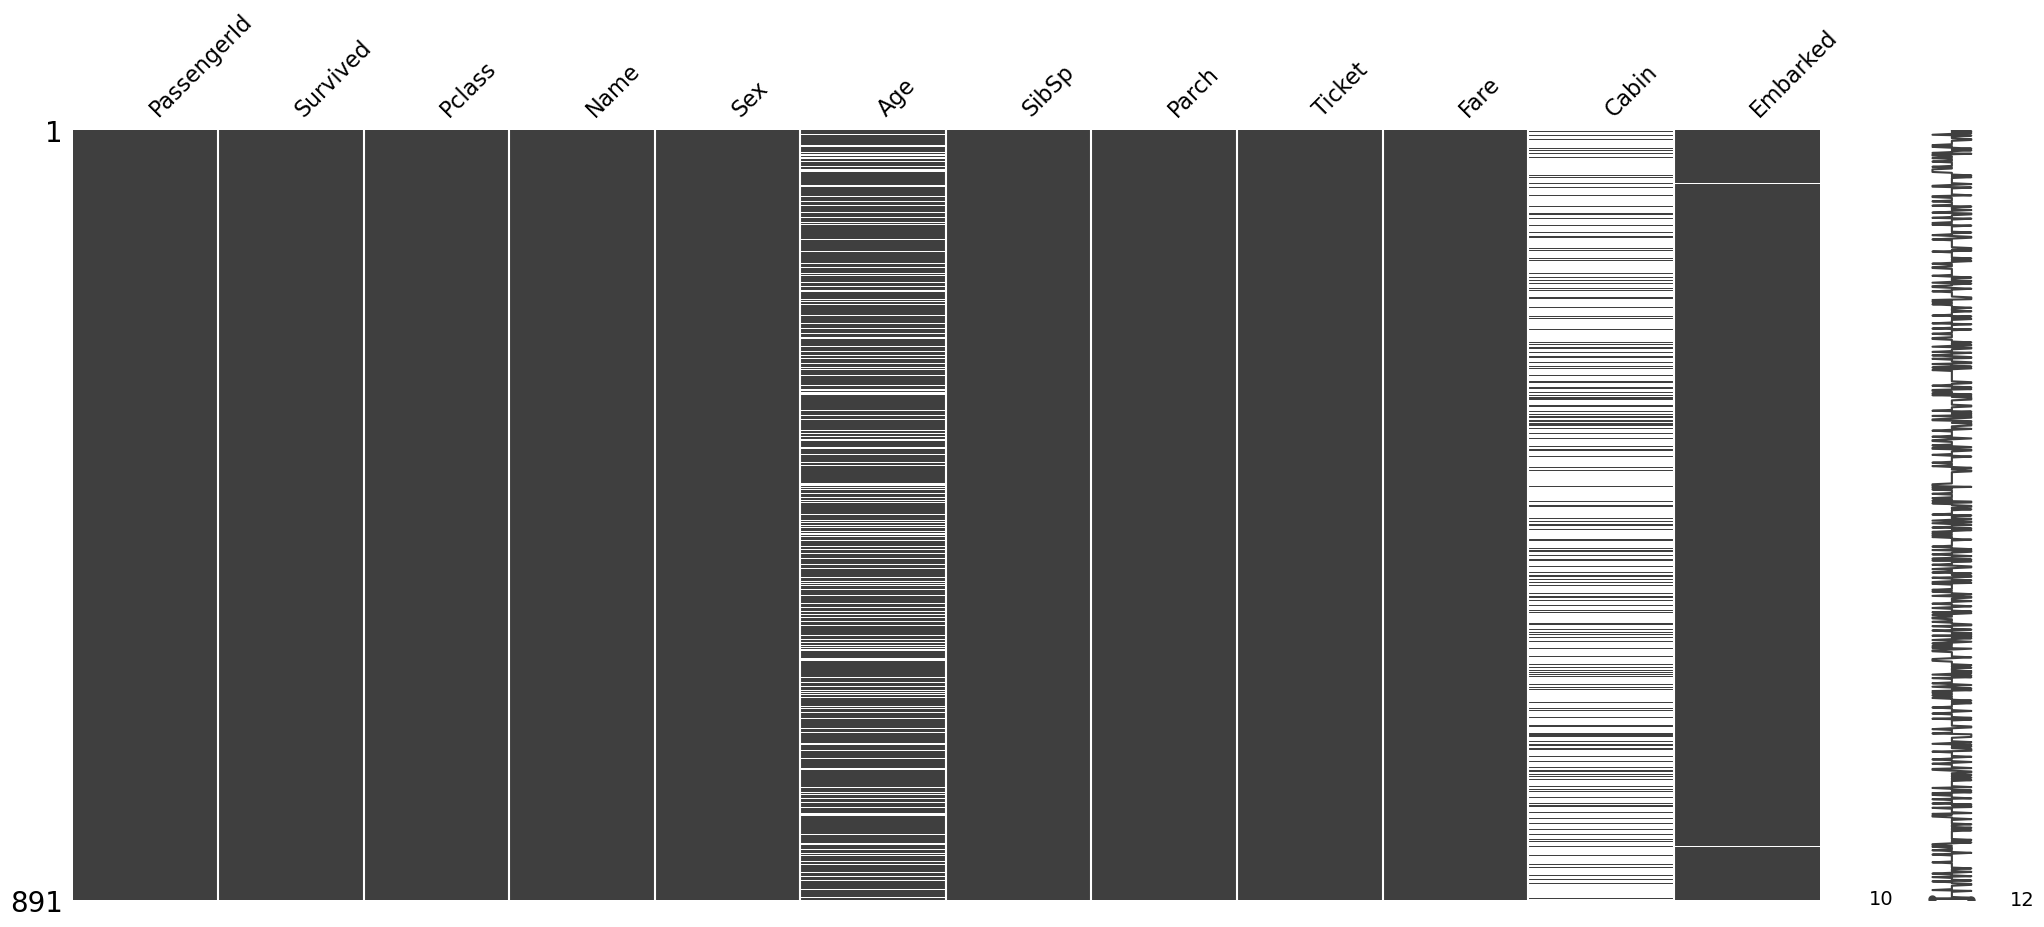

In [13]:
msno.matrix(df)

<Axes: >

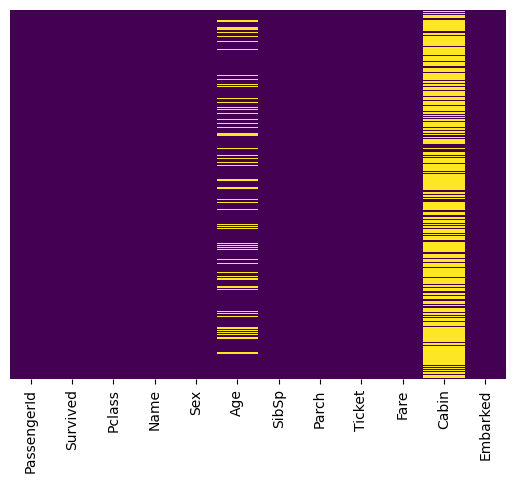

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Information about missing data from age and cabin feature(columns)
- Roughly 20 percent of the Age data is missing.The proportion of Age missing is likely small enough for resonable replacement
  with some form of imputation.
- Looking at the Cabin column,it looks like we are just missing too much data. We probably drop this later or change it to another
  feature like "Cabin_known:1 or 0"

##### Let's continue on by visualization some more of the data!

<Axes: xlabel='Survived', ylabel='count'>

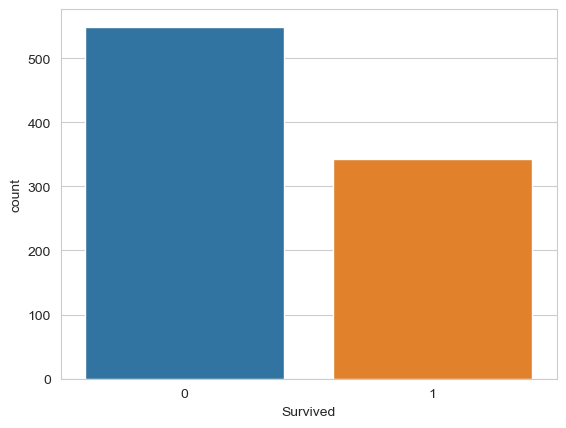

In [15]:
# set_style() :- set general style of the plot
# countplot() :- count no of observation from categorical feature
sns.set_style("whitegrid")
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Survived', ylabel='count'>

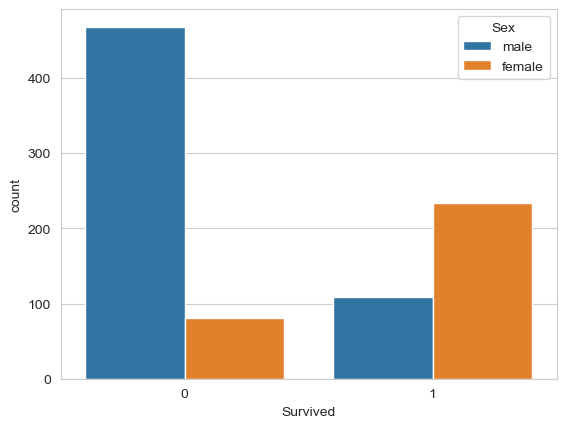

In [16]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue='Sex',data=df)

<Axes: xlabel='Survived', ylabel='count'>

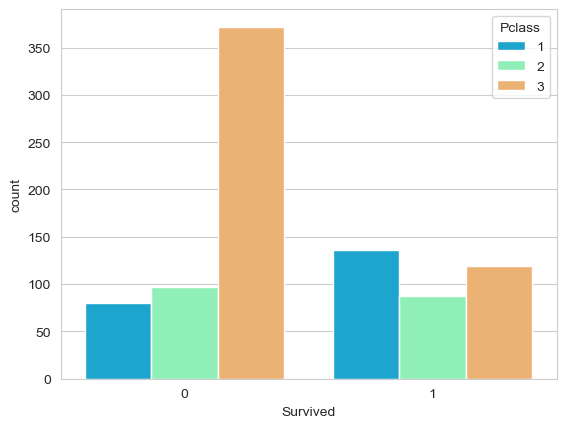

In [17]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')
#Pclass is ordinal data because Pclass 1 is indicate rich person ans 2 indicate medical class person

C:\Users\Sairam\AppData\Local\Temp\ipykernel_10876\2161514171.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(),color='darkred',kde=False,bins=40)


<Axes: xlabel='Age'>

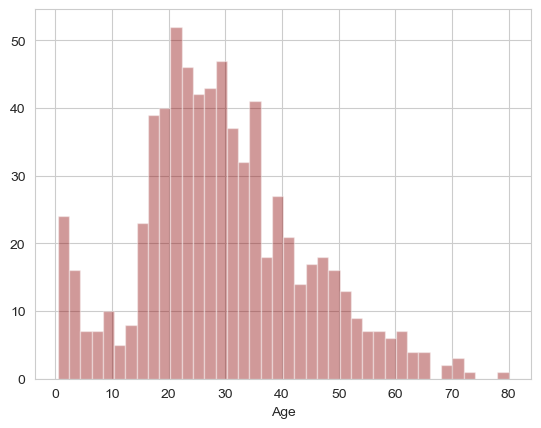

In [18]:
#to find out the what was the age group of people present in titanic so we used distplot() i.e distribution plot

sns.distplot(df['Age'].dropna(),color='darkred',kde=False,bins=40)

<Axes: >

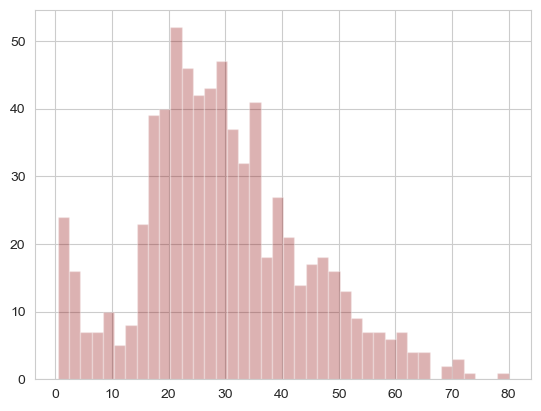

In [19]:
# .hist() from matplotlib library
df['Age'].hist(color='darkred',bins=40,alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

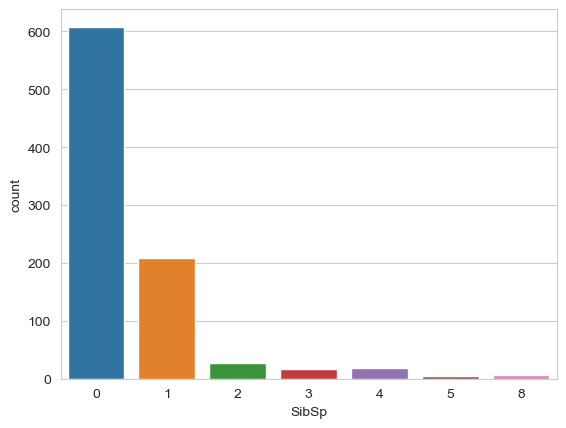

In [20]:
df.head()
df['SibSp'].value_counts()
#SibSp :- siblings and spouse
sns.countplot(x='SibSp',data=df)
# to count no of siblings and spouse in tatinic

<Axes: >

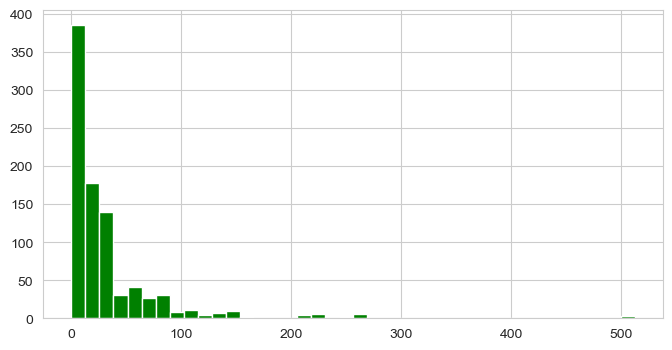

In [21]:
df['Fare'].hist(color = 'green',bins=40,figsize=(8,4))

# Data cleaning
- We want to fill in missing age data instead of just dropping the missing age data rows.
- One way to do this is by filling in the mean age of all the passengers(imputation).
- However we can be smarter about this and check the average age by passenger class.

<Axes: xlabel='Pclass', ylabel='Age'>

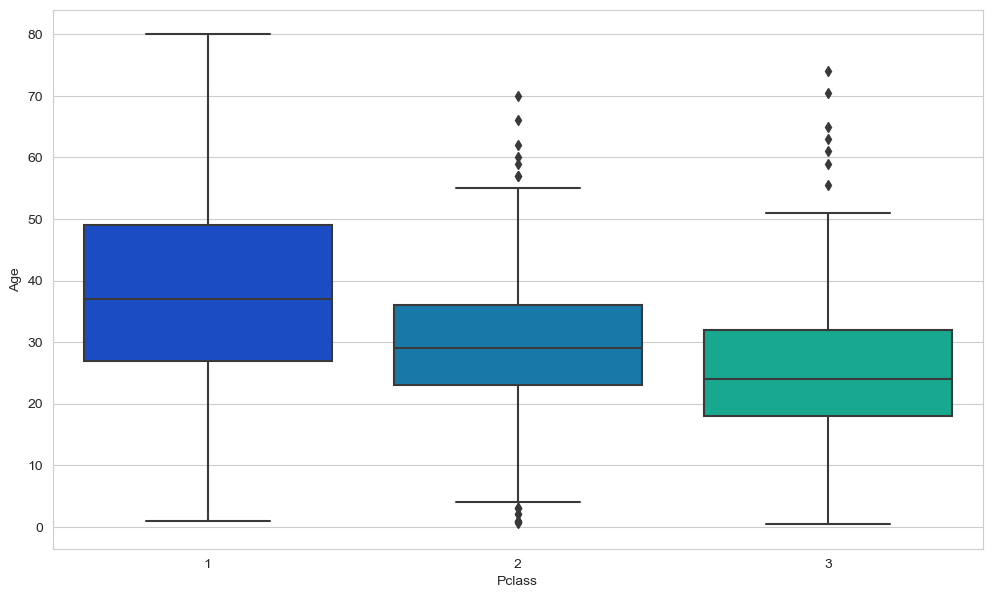

In [22]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

##### Some additional information about boxplot which apply on age and pclass features

- by using box plot we get five number figure
- that exaplin or give the information about average value of each features
- here in passenger class 1 have 37 average,passenger class 2 have 29 age i.e average 
  and passenger class 3 have 27 age average


We can see the weather in the higher classestend to be older,which makes sense.
we'll use these average age values to impute based on Pclass and Age

In [23]:
# create function to replace NaN value in age column by related to Pclass(passenger class)

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

Now apply the function

In [24]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

###### Now.apply heatmap() to check null value of each feature i.e heatmap(data,yticklabels)

<Axes: >

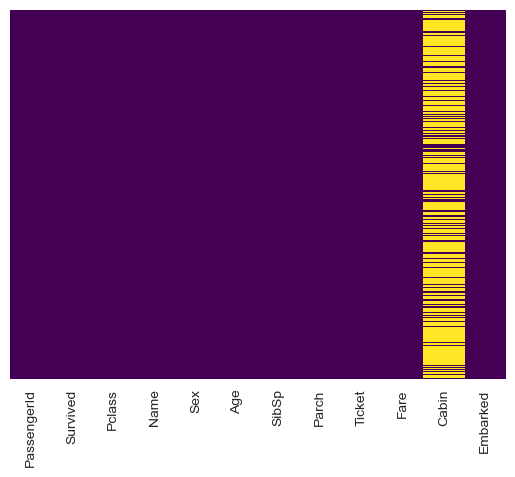

In [29]:
sns.heatmap(df.isnull(),yticklabels =False,cbar=False,cmap='viridis')

###### by above heatmap, we analysis that Cabin features have maximum NaN value so we drop that column

In [32]:
df.drop('Cabin',axis=1,inplace=True)
# axis=0 for row and axis = 1 for column
# inplace = True it means it doesn't return data set

In [35]:
df.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


### Converting Categorical Features
- we'll need to convert categorical features to dummy variables using pandas!
- Otherwise our machine learning algorithm won't be able to directly take in those features as inputs

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


- In this data set Passengerid,name,ticket are not reqired for predication model so drop that columns or features
- Sex and Embarked are categorical features so we'll need to convert into numerical by inbuild function get_dummies()
- get_dummies() function convert that category into column

In [39]:
pd.get_dummies(df['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [43]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [52]:
sex = pd.get_dummies(df["Sex"],drop_first=True)
embark = pd.get_dummies(df["Embarked"],drop_first=True)

KeyError: 'Sex'

In [49]:
#Drop that columns are not required

df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

KeyError: "['Sex', 'Embarked', 'Name', 'Ticket'] not found in axis"

In [55]:
# add dummy features in data sets

df = pd.concat([df,sex,embark],axis=1)

In [56]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,1,0,1
